In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy
from sklearn import preprocessing
import tensorflow as tf
from numpy.fft import *

import os
from os import listdir
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from verta.integrations.keras import VertaCallback


from verta import Client
import copy

#import os
#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
path_First_sticker= '../../First Dataset collected on 3 December 2020/Data_to_be_process/First_Sticker'

# Importing Modes for First Sticker

- IQ data are raw time series directly exported from SignalVU

In [3]:
First_Sticker_BackgroundRFactivities = pd.read_csv(path_First_sticker+'/BackgroundRFactivities.csv')
First_Sticker_Connected = pd.read_csv(path_First_sticker+'/Connected.csv')
First_Sticker_Searching = pd.read_csv(path_First_sticker+'/Searching.csv')
First_Sticker_Searching_without_connected = pd.read_csv(path_First_sticker+'/Searching_without_connecting_to_app.csv')

### Example of  how one mode of I Q Samples looks like [ Connected ]


In [4]:
First_Sticker_Connected

,Version,0.3
0,-3.400000e-07,0.000046
1,-7.220000e-06,0.000019
2,-3.926000e-05,-0.000035
3,-1.676000e-05,-0.000051
4,1.713000e-05,-0.000039
...,...,...
3386995,3.482000e-05,-0.000020
3386996,-3.152000e-05,0.000032
3386997,2.690000e-06,-0.000015
3386998,4.099000e-05,-0.000079


In [5]:
# Renaming the Title of each coloum 

First_Sticker_BackgroundRFactivities=First_Sticker_BackgroundRFactivities.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
First_Sticker_Connected=First_Sticker_Connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
First_Sticker_Searching=First_Sticker_Searching.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
First_Sticker_Searching_without_connected=First_Sticker_Searching_without_connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})


In [6]:
First_Sticker_Connected

,I_Data,Q_Data
0,-3.400000e-07,0.000046
1,-7.220000e-06,0.000019
2,-3.926000e-05,-0.000035
3,-1.676000e-05,-0.000051
4,1.713000e-05,-0.000039
...,...,...
3386995,3.482000e-05,-0.000020
3386996,-3.152000e-05,0.000032
3386997,2.690000e-06,-0.000015
3386998,4.099000e-05,-0.000079


In [7]:
# converting Pandas to Numpy for easier plotting
First_Sticker_BackgroundRFactivities_numpy = First_Sticker_BackgroundRFactivities.to_numpy()
First_Sticker_Connected_numpy = First_Sticker_Connected.to_numpy()
First_Sticker_Searching_numpy = First_Sticker_Searching.to_numpy()
First_Sticker_Searching_without_connected_numpy = First_Sticker_Searching_without_connected.to_numpy()

## FFT BackGround RF Activities [ First Sticker ]

- Without Absolute Intensity Background RF activities

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


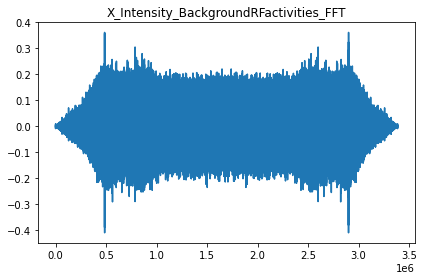

In [8]:
# Index 0 : I Data
# Index 1 : Q Data 

I_Data_First_BackgroundRFactivities_FFT = First_Sticker_BackgroundRFactivities_numpy[0:,0]
Q_Data_First_BackgroundRFactivities_FFT = First_Sticker_BackgroundRFactivities_numpy[0:,1]


X_Intensity_BackgroundRFactivities_FFT = np.fft.fftshift(fft(I_Data_First_BackgroundRFactivities_FFT[:]-np.mean(I_Data_First_BackgroundRFactivities_FFT[:])))
plt.plot(X_Intensity_BackgroundRFactivities_FFT)
plt.title("X_Intensity_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

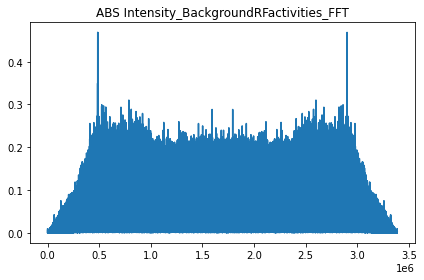

In [9]:
X_Intensity_BackgroundRFactivities_FFT_ABS = abs(np.fft.fftshift(fft(I_Data_First_BackgroundRFactivities_FFT[:]-np.mean(I_Data_First_BackgroundRFactivities_FFT[:]))))
plt.plot(X_Intensity_BackgroundRFactivities_FFT_ABS)
plt.title("ABS Intensity_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

- Without Absolute Quadrature Background RF activities

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


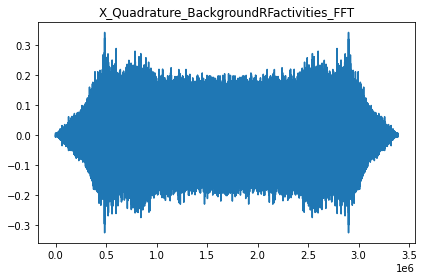

In [10]:
X_Quadrature_BackgroundRFactivities_FFT = np.fft.fftshift(fft(Q_Data_First_BackgroundRFactivities_FFT[:]-np.mean(Q_Data_First_BackgroundRFactivities_FFT[:])))
plt.plot(X_Quadrature_BackgroundRFactivities_FFT)
plt.title("X_Quadrature_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

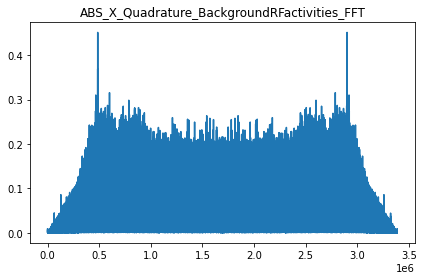

In [11]:
X_Quadrature_BackgroundRFactivities_FFT_ABS = abs(np.fft.fftshift(fft(Q_Data_First_BackgroundRFactivities_FFT[:]-np.mean(Q_Data_First_BackgroundRFactivities_FFT[:]))))
plt.plot(X_Quadrature_BackgroundRFactivities_FFT_ABS)
plt.title("ABS_X_Quadrature_BackgroundRFactivities_FFT")
plt.tight_layout()
plt.show()

# FFT Connected [ First Sticker ]

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


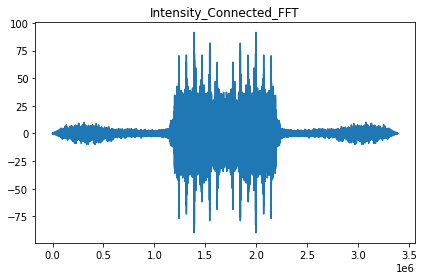

In [12]:
I_Data_First_Connected_FFT = First_Sticker_Connected_numpy[0:,0]
Q_Data_First_Connected_FFT = First_Sticker_Connected_numpy[0:,1]


X_Intensity_FFT_Connected = np.fft.fftshift(fft(I_Data_First_Connected_FFT[:]-np.mean(I_Data_First_Connected_FFT[:])))
plt.plot(X_Intensity_FFT_Connected )
plt.title("Intensity_Connected_FFT")
plt.tight_layout()
plt.show()

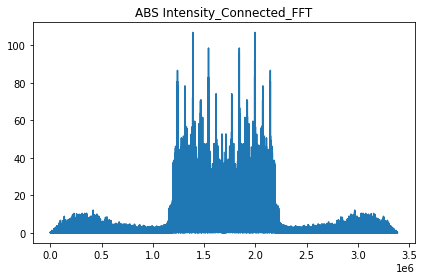

In [13]:
I_Data_First_Connected_FFT = First_Sticker_Connected_numpy[0:,0]
Q_Data_First_Connected_FFT = First_Sticker_Connected_numpy[0:,1]


X_Intensity_FFT_Connected_ABS = abs(np.fft.fftshift(fft(I_Data_First_Connected_FFT[:]-np.mean(I_Data_First_Connected_FFT[:]))))
plt.plot(X_Intensity_FFT_Connected_ABS )
plt.title("ABS Intensity_Connected_FFT")
plt.tight_layout()
plt.show()

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


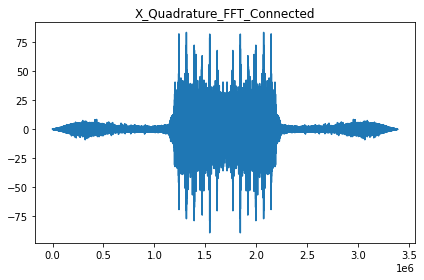

In [14]:
X_Quadrature_FFT_Connected = np.fft.fftshift(fft(Q_Data_First_Connected_FFT[:]-np.mean(Q_Data_First_Connected_FFT[:])))
plt.plot(X_Quadrature_FFT_Connected )
plt.title("X_Quadrature_FFT_Connected")
plt.tight_layout()
plt.show()

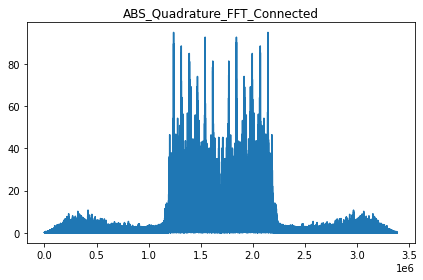

In [15]:
X_Quadrature_FFT_Connected_ABS = abs(np.fft.fftshift(fft(Q_Data_First_Connected_FFT[:]-np.mean(Q_Data_First_Connected_FFT[:]))))
plt.plot(X_Quadrature_FFT_Connected_ABS )
plt.title("ABS_Quadrature_FFT_Connected")
plt.tight_layout()
plt.show()

# FFT Searching [ First sticker ]

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


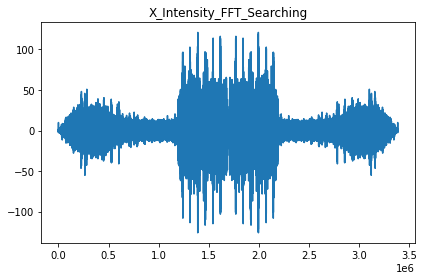

In [16]:
I_Data_First_Searching_FFT = First_Sticker_Searching_numpy[0:,0]
Q_Data_First_Searching_FFT = First_Sticker_Searching_numpy[0:,1]


X_Intensity_FFT_Searching = np.fft.fftshift(fft(I_Data_First_Searching_FFT[:]-np.mean(I_Data_First_Searching_FFT[:])))
plt.plot(X_Intensity_FFT_Searching )
plt.title("X_Intensity_FFT_Searching")
plt.tight_layout()
plt.show()

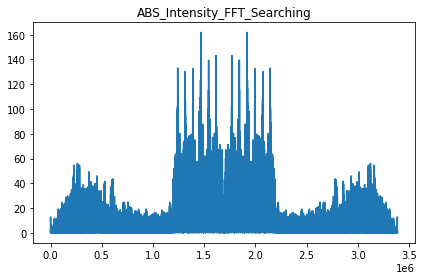

In [17]:

X_Intensity_FFT_Searching_ABS = abs(np.fft.fftshift(fft(I_Data_First_Searching_FFT[:]-np.mean(I_Data_First_Searching_FFT[:]))))
plt.plot(X_Intensity_FFT_Searching_ABS )
plt.title("ABS_Intensity_FFT_Searching")
plt.tight_layout()
plt.show()

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


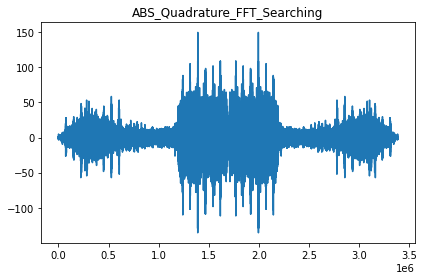

In [18]:
X_Quadrature_FFT_Searching = np.fft.fftshift(fft(Q_Data_First_Searching_FFT[:]-np.mean(Q_Data_First_Searching_FFT[:])))
plt.plot(X_Quadrature_FFT_Searching)
plt.title("ABS_Quadrature_FFT_Searching")
plt.tight_layout()
plt.show()

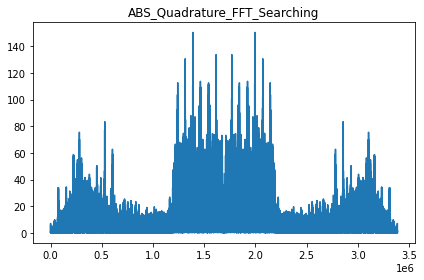

In [19]:
X_Quadrature_FFT_Searching_ABS = abs(np.fft.fftshift(fft(Q_Data_First_Searching_FFT[:]-np.mean(Q_Data_First_Searching_FFT[:]))))
plt.plot(X_Quadrature_FFT_Searching_ABS )
plt.title("ABS_Quadrature_FFT_Searching")
plt.tight_layout()
plt.show()

# Searching with WIFI established [ First Sticker ] 

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


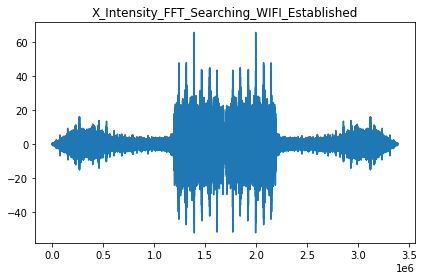

In [20]:
I_Data_First_Searching_WIFI_established_FFT = First_Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_First_Searching_WIFI_established_FFT = First_Sticker_Searching_without_connected_numpy[0:,1]

X_Intensity_FFT_Searching_WIFI_established = np.fft.fftshift(fft(I_Data_First_Searching_WIFI_established_FFT[:]-np.mean(I_Data_First_Searching_WIFI_established_FFT[:])))
plt.plot(X_Intensity_FFT_Searching_WIFI_established )
plt.title("X_Intensity_FFT_Searching_WIFI_Established")
plt.tight_layout()
plt.show()

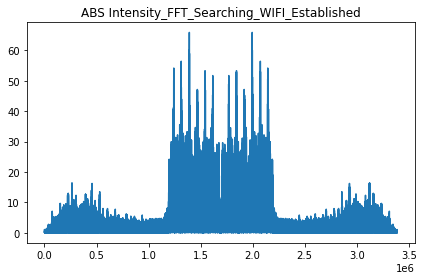

In [21]:
I_Data_First_Searching_WIFI_established_FFT = First_Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_First_Searching_WIFI_established_FFT = First_Sticker_Searching_without_connected_numpy[0:,1]

X_Intensity_FFT_Searching_WIFI_established_ABS = abs(np.fft.fftshift(fft(I_Data_First_Searching_WIFI_established_FFT[:]-np.mean(I_Data_First_Searching_WIFI_established_FFT[:]))))
plt.plot(X_Intensity_FFT_Searching_WIFI_established_ABS )
plt.title("ABS Intensity_FFT_Searching_WIFI_Established")
plt.tight_layout()
plt.show()

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


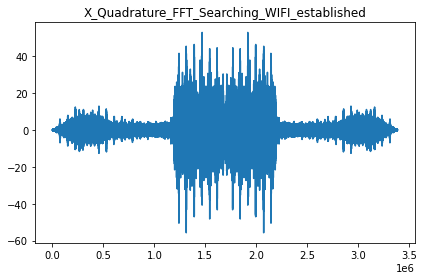

In [22]:
X_Quadrature_FFT_Searching_WIFI_established = np.fft.fftshift(fft(Q_Data_First_Searching_WIFI_established_FFT[:]-np.mean(Q_Data_First_Searching_WIFI_established_FFT[:])))
plt.plot(X_Quadrature_FFT_Searching_WIFI_established )
plt.title("X_Quadrature_FFT_Searching_WIFI_established")
plt.tight_layout()
plt.show()

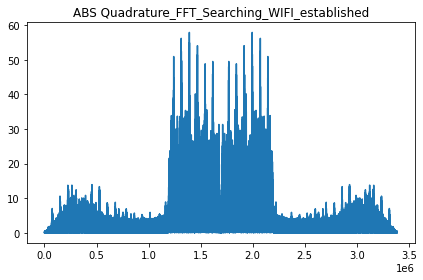

In [23]:
X_Quadrature_FFT_Searching_WIFI_established_ABS = abs(np.fft.fftshift(fft(Q_Data_First_Searching_WIFI_established_FFT[:]-np.mean(Q_Data_First_Searching_WIFI_established_FFT[:]))))
plt.plot(X_Quadrature_FFT_Searching_WIFI_established_ABS )
plt.title("ABS Quadrature_FFT_Searching_WIFI_established")
plt.tight_layout()
plt.show()

# Machine Learning

- Complex Number I+jQ 

In [24]:
I_Data_First_Searching_WIFI_established_FFT

array([ 3.43500e-05, -4.37400e-05, -8.93100e-05, ...,  3.65407e-03,
        4.31784e-03,  3.26604e-03])

In [25]:
Q_Data_First_Searching_WIFI_established_FFT

array([-2.54800e-05,  4.53000e-06,  1.29800e-05, ..., -3.43504e-03,
       -1.33074e-03,  1.46160e-03])

In [26]:
complex_num_Searching_WIFI_Established = I_Data_First_Searching_WIFI_established_FFT + 1j*Q_Data_First_Searching_WIFI_established_FFT

In [27]:
complex_num_Searching_WIFI_Established

array([ 3.43500e-05-2.54800e-05j, -4.37400e-05+4.53000e-06j,
       -8.93100e-05+1.29800e-05j, ...,  3.65407e-03-3.43504e-03j,
        4.31784e-03-1.33074e-03j,  3.26604e-03+1.46160e-03j])

/mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


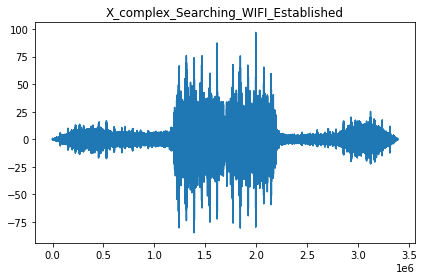

In [28]:
X_complex_Searching_WIFI_Established = (np.fft.fftshift(fft(complex_num_Searching_WIFI_Established[:]-np.mean(complex_num_Searching_WIFI_Established[:]))))
plt.plot(X_complex_Searching_WIFI_Established )
plt.title("X_complex_Searching_WIFI_Established")
plt.tight_layout()
plt.show()

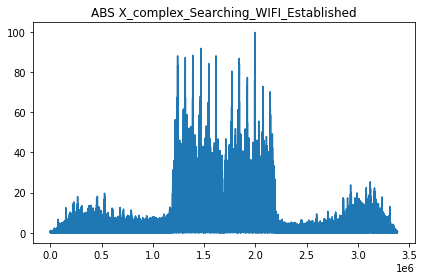

In [29]:
X_complex_Searching_WIFI_Established_ABS = abs(np.fft.fftshift(fft(complex_num_Searching_WIFI_Established[:]-np.mean(complex_num_Searching_WIFI_Established[:]))))
plt.plot(X_complex_Searching_WIFI_Established_ABS )
plt.title("ABS X_complex_Searching_WIFI_Established")
plt.tight_layout()
plt.show()

# Complex Signal I&Q  Dataset

In [30]:
complex_num_Searching_WIFI_Established = I_Data_First_Searching_WIFI_established_FFT + 1j*Q_Data_First_Searching_WIFI_established_FFT
complex_num_Connected = I_Data_First_Connected_FFT+1j*Q_Data_First_Connected_FFT
complex_num_Background = I_Data_First_BackgroundRFactivities_FFT+1j*Q_Data_First_BackgroundRFactivities_FFT
complex_num_Searching = I_Data_First_Searching_FFT+1j*Q_Data_First_Searching_FFT

In [31]:
X_complex_Connected = abs(np.fft.fftshift(fft(complex_num_Connected[:]-np.mean(complex_num_Connected[:]))))
X_complex_Searching = abs(np.fft.fftshift(fft(complex_num_Searching[:]-np.mean(complex_num_Searching[:]))))
X_complex_Background = abs(np.fft.fftshift(fft(complex_num_Background[:]-np.mean(complex_num_Background[:]))))
X_complex_Searching_WIFI_Established = abs(np.fft.fftshift(fft(complex_num_Searching_WIFI_Established[:]-np.mean(complex_num_Searching_WIFI_Established[:]))))

In [32]:
print("Shape of one mode : "+ str(X_complex_Background.shape))

Shape of one mode : (3387000,)


# Reshaping


In [33]:
Size_of_Input_Feature = 500
size = X_complex_Background.shape[0]
Divided = int(size / Size_of_Input_Feature)


In [34]:
X_complex_Connected= X_complex_Connected.reshape(Divided,Size_of_Input_Feature)
X_complex_Searching= X_complex_Searching.reshape(Divided,Size_of_Input_Feature)
X_complex_Background= X_complex_Background.reshape(Divided,Size_of_Input_Feature)
X_complex_Searching_WIFI_Established= X_complex_Searching_WIFI_Established.reshape(Divided,Size_of_Input_Feature)

In [35]:
print("Shape of one mode after reshaping : "+ str(X_complex_Background.shape))

Shape of one mode after reshaping : (6774, 500)


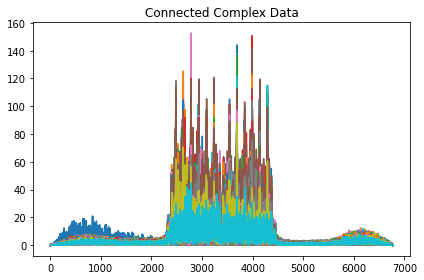

In [36]:
plt.plot(X_complex_Connected[0:])
plt.title("Connected Complex Data")
plt.tight_layout()
plt.show()

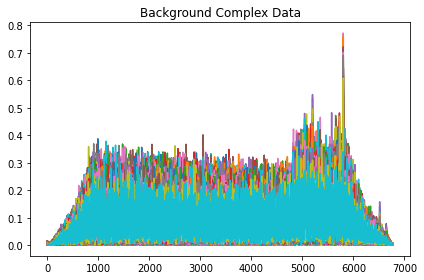

In [37]:
plt.plot(X_complex_Background[0:])
plt.title("Background Complex Data")
plt.tight_layout()
plt.show()

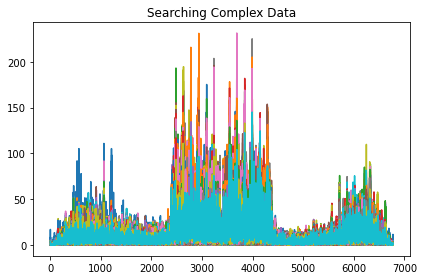

In [38]:
plt.plot(X_complex_Searching[0:])
plt.title("Searching Complex Data")
plt.tight_layout()
plt.show()

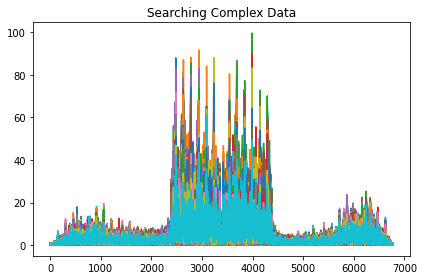

In [39]:
plt.plot(X_complex_Searching_WIFI_Established[0:])
plt.title("Searching Complex Data")
plt.tight_layout()
plt.show()

# Labelling

In [40]:
from sklearn.preprocessing import OneHotEncoder

Label =[['BackgroundRFactivities'],['Connected'],['Searching'],['Searching_WIFI_Establised']]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(Label)

Labelled = enc.transform(Label)

Labelled

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [41]:
np.random.seed(2016)

Complex_backgroundRFactivites_concatenate = np.tile(Labelled[0][np.newaxis,:],(X_complex_Background.shape[0],1))
Complex_BackgroundRFactivites_dataset=np.concatenate((X_complex_Background,Complex_backgroundRFactivites_concatenate),axis=1)
print("Connected dataset shape : " + str(Complex_BackgroundRFactivites_dataset.shape))

Complex_connected_concatenate = np.tile(Labelled[1][np.newaxis,:],(X_complex_Connected.shape[0],1))
Complex_connected_dataset=np.concatenate((X_complex_Connected,Complex_connected_concatenate),axis=1)
print("Connected dataset shape : " + str(Complex_connected_dataset.shape))

Complex_searching_concatenate = np.tile(Labelled[2][np.newaxis,:],(X_complex_Searching.shape[0],1))
Complex_searching_dataset=np.concatenate((X_complex_Searching,Complex_searching_concatenate),axis=1)
print("Connected dataset shape : " + str(Complex_searching_dataset.shape))

Complex_searching_wifi_established_concatenate = np.tile(Labelled[3][np.newaxis,:],(X_complex_Searching_WIFI_Established.shape[0],1))
Complex_searching_wifi_established_dataset=np.concatenate((X_complex_Searching_WIFI_Established,Complex_searching_wifi_established_concatenate),axis=1)
print("Connected dataset shape : " + str(Complex_searching_wifi_established_dataset.shape))

print('\n')
print(Complex_BackgroundRFactivites_dataset[0:5])
print('\n')
print(Complex_connected_dataset[0:5])
print('\n')
print(Complex_searching_dataset[0:5])
print('\n')
print(Complex_searching_wifi_established_dataset[0:5])

Connected dataset shape : (6774, 504)
Connected dataset shape : (6774, 504)
Connected dataset shape : (6774, 504)
Connected dataset shape : (6774, 504)


[[0.00536385 0.00318379 0.00352659 ... 0.         0.         0.        ]
 [0.01243846 0.00840493 0.00727754 ... 0.         0.         0.        ]
 [0.00696465 0.00774645 0.00075769 ... 0.         0.         0.        ]
 [0.00153724 0.00256641 0.00191992 ... 0.         0.         0.        ]
 [0.0016829  0.00275497 0.00179055 ... 0.         0.         0.        ]]


[[0.14584712 0.14259289 0.16344961 ... 1.         0.         0.        ]
 [0.60553256 0.08004479 0.22847317 ... 1.         0.         0.        ]
 [0.07151008 0.08402467 0.12069099 ... 1.         0.         0.        ]
 [0.2205416  0.01123986 0.13987565 ... 1.         0.         0.        ]
 [0.09767135 0.10646421 0.12261519 ... 1.         0.         0.        ]]


[[ 1.06595631  0.62833014  0.49864053 ...  0.          1.
   0.        ]
 [17.15451199  3.6731937   2.22318829

In [42]:
import copy
stacked_data=np.vstack((Complex_BackgroundRFactivites_dataset,Complex_connected_dataset,Complex_searching_dataset,Complex_searching_wifi_established_dataset))
Dataset_Label_shuffled = copy.copy(stacked_data)
np.random.shuffle(Dataset_Label_shuffled)


In [43]:
length_of_X_train = int(0.7*Dataset_Label_shuffled.shape[0]) #2800
length_of_X_validation = (int(0.2*Dataset_Label_shuffled.shape[0]))+length_of_X_train #800 #3600
print(length_of_X_validation)

24386


In [44]:
Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,0:Size_of_Input_Feature]
print(Train_Dataset.shape)
Y_Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,Size_of_Input_Feature:]
print(Y_Train_Dataset)

(18967, 500)
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [45]:
Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,0:Size_of_Input_Feature]
Y_Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,Size_of_Input_Feature:]
print(Validation_Dataset.shape)

(5419, 500)


In [46]:
#Train_Dataset=Train_Dataset.reshape(length_of_X_train,Size_of_Input_Feature,1)
#Validation_Dataset=Validation_Dataset.reshape(800,Size_of_Input_Feature,1)
#print(Validation_Dataset.shape)

In [47]:
Train_Dataset=Train_Dataset.reshape(18967,500,1)
Validation_Dataset=Validation_Dataset.reshape(5419,500,1)
print(Validation_Dataset.shape)

(5419, 500, 1)


In [48]:
  
import keras
import keras.models as models
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D, Conv1D, MaxPooling1D
from keras.layers.core import Flatten, Dense, Dropout, Activation, Reshape

def getBaselineModel(slice_size, classes=4, cnn_stacks=3, fc_stacks=1, channels=128, dropout_flag=True, \
                        fc1=256, fc2=128, batchnorm=False, \
                        #optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), \
                        loss='categorical_crossentropy'):
    """A dummy model to test the functionalities of the Data Generator"""
    model = models.Sequential()
    model.add(Conv1D(channels,7,activation='relu', padding='same', input_shape=(slice_size, 1)))
    model.add(Conv1D(channels,5, padding='same'))
    if batchnorm:
        model.add(keras.layers.BatchNormalization(momentum=0.9, name='bn_1'))
    model.add(Activation('relu'))
    model.add(MaxPooling1D())
    for i in range(1, cnn_stacks):
        model.add(Conv1D(channels,7,activation='relu', padding='same'))
        model.add(Conv1D(channels,5, padding='same'))
        if batchnorm:
            model.add(keras.layers.BatchNormalization(momentum=0.9, name='bn_'+str(i+1)))
        model.add(Activation('relu'))
        model.add(MaxPooling1D())
    #model.add(Conv1D(128,7,activation='relu', padding='same'))
    #model.add(Conv1D(128,5,activation='relu', padding='same'))
    #model.add(MaxPooling1D())
    model.add(Flatten())
    for j in range(1, fc_stacks):
        model.add(Dense(fc1, activation='relu'))
        if dropout_flag:
            model.add(Dropout(0.5))
    model.add(Dense(fc2, activation='relu'))
    if dropout_flag:
        model.add(Dropout(0.5))
    model.add(Dense(classes, activation='softmax'))

    #optimizer = optimizer
    #optimizer = Adam(lr=lr, beta_1=beta_2, beta_2=beta_2, epsilon=epsilon, decay=decay, amsgrad=amsgrad)
    #model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    #model.summary()

    return model

In [49]:
model_1223 = getBaselineModel(slice_size=500)

In [50]:
model_1223.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
history3 = model_1223.fit(Train_Dataset, Y_Train_Dataset, epochs=6000, batch_size=100,validation_data=(Validation_Dataset, Y_Validation_Dataset),
    callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')])

Epoch 1/6000
190/190 [==============================] - 5s 27ms/step - loss: 0.8811 - accuracy: 0.5787 - val_loss: 0.6443 - val_accuracy: 0.7040
Epoch 2/6000
190/190 [==============================] - 5s 26ms/step - loss: 0.5918 - accuracy: 0.7376 - val_loss: 0.4272 - val_accuracy: 0.8367
Epoch 3/6000
190/190 [==============================] - 5s 26ms/step - loss: 0.4401 - accuracy: 0.8193 - val_loss: 0.3171 - val_accuracy: 0.8895
Epoch 4/6000
190/190 [==============================] - 5s 26ms/step - loss: 0.3509 - accuracy: 0.8670 - val_loss: 0.3159 - val_accuracy: 0.8681
Epoch 5/6000
190/190 [==============================] - 5s 26ms/step - loss: 0.3117 - accuracy: 0.8864 - val_loss: 0.2218 - val_accuracy: 0.9149
Epoch 6/6000
190/190 [==============================] - 5s 26ms/step - loss: 0.2664 - accuracy: 0.9042 - val_loss: 0.1931 - val_accuracy: 0.9304
Epoch 7/6000
190/190 [==============================] - 5s 26ms/step - loss: 0.2492 - accuracy: 0.9077 - val_loss: 0.1926 - val_ac

# Loss Curve - Training and Validation Loss

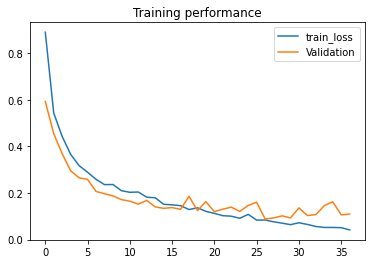

In [106]:
plt.figure()
plt.title('Training performance')
plt.plot(history3.history['loss'], label='train_loss')
plt.plot(history3.history['val_loss'], label='Validation')
plt.legend()
plt.show()

In [107]:
_, accuracy_validation = model_1223.evaluate(Validation_Dataset, Y_Validation_Dataset)
print('Accuracy_validation: %.2f' % (accuracy_validation*100))



170/170 [==============================] - 1s 4ms/step - loss: 0.1096 - accuracy: 0.9629
Accuracy_validation: 96.29


In [108]:
model_1223.save("{Model FFT Cov1D} First sticker Trained")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: {Model FFT Cov1D} First sticker Trained/assets


# Using Fifth Model as Trained Model 

In [52]:
from tensorflow import keras
load_Fifth_sticker_model = keras.models.load_model("{Model FFT Cov1D} Fifth sticker Trained")
_,accuracy=load_Fifth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

170/170 [==============================] - 1s 5ms/step - loss: 91.1022 - accuracy: 0.4403
44.030264019966125


# Using Fourth Model as Trained Model


In [53]:
from tensorflow import keras
load_fourth_sticker_model = keras.models.load_model("{Model FFT Cov1D} Fourth sticker Trained")
_,accuracy=load_fourth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

170/170 [==============================] - 1s 4ms/step - loss: 122.6467 - accuracy: 0.4982
49.82469081878662


# Using Third Model as Trained Model

In [54]:
from tensorflow import keras
load_third_sticker_model = keras.models.load_model("{Model FFT Cov1D} Third sticker Trained")
_,accuracy=load_third_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

170/170 [==============================] - 1s 5ms/step - loss: 69.1350 - accuracy: 0.4726
47.25964069366455


# Using First Model as Trained Model [ Validation Own ]

In [55]:
from tensorflow import keras
load_third_sticker_model = keras.models.load_model("{Model FFT Cov1D} First sticker Trained")
_,accuracy=load_third_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print(accuracy*100)

170/170 [==============================] - 1s 5ms/step - loss: 0.1096 - accuracy: 0.9629
96.29082679748535


Epoch 1/6000


ValueError: in user code:

    /mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /mnt/DATA/projects/signals/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:196 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: : expected min_ndim=3, found ndim=2. Full shape received: [None, 120]
